<a href="https://colab.research.google.com/github/fff1316169257/Jiayi_FU-GIS/blob/main/ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade  mapclassify==2.5.0

In [ ]:

import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()
import geopandas as gpd

In [ ]:
import time, webbrowser, zipfile


from google.colab import data_table
data_table.enable_dataframe_formatter()

from geopandas.tools import geocode
#! pip install geocoder
from geopy.geocoders import Nominatim
#if you do a lot of geocoding:
#https://developers.google.com/maps/documentation/geocoding/overview

geolocator = Nominatim(user_agent='blah@gmail.com')

from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install mapclassify
import mapclassify

#Part 1#
## Some people are at higher risk of serious illness. Certain respiratory viruses, COVID-19, influenza, and respiratory syncytial virus infection viruses. That viral respiratory disease has affected people’s lives during COVID-19.(2022 - 2023)##

In [ ]:

! wget -q -O  2023_Respiratory_Virus_Response_-_NSSP_Emergency_Department_Visits_-_COVID-19__Flu__RSV__Combined.csv 'https://doc.google.com/uc?export=download&id=1VV0-QMmYYObj5xcBm4h4nX21ePVHPskm&export=download'
data = pd.read_csv('2023_Respiratory_Virus_Response_-_NSSP_Emergency_Department_Visits_-_COVID-19__Flu__RSV__Combined.csv')

<Figure size 1500x800 with 0 Axes>

Text(0.5, 0, 'Week Ending')

Text(0, 0.5, 'Percent of Emergency Department Visits')

Text(0.5, 1.0, 'Percent of Emergency Department Visits by Pathogen Over Time')

(array([19297., 19358., 19417., 19478., 19539., 19601., 19662.]),
 [Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11')])

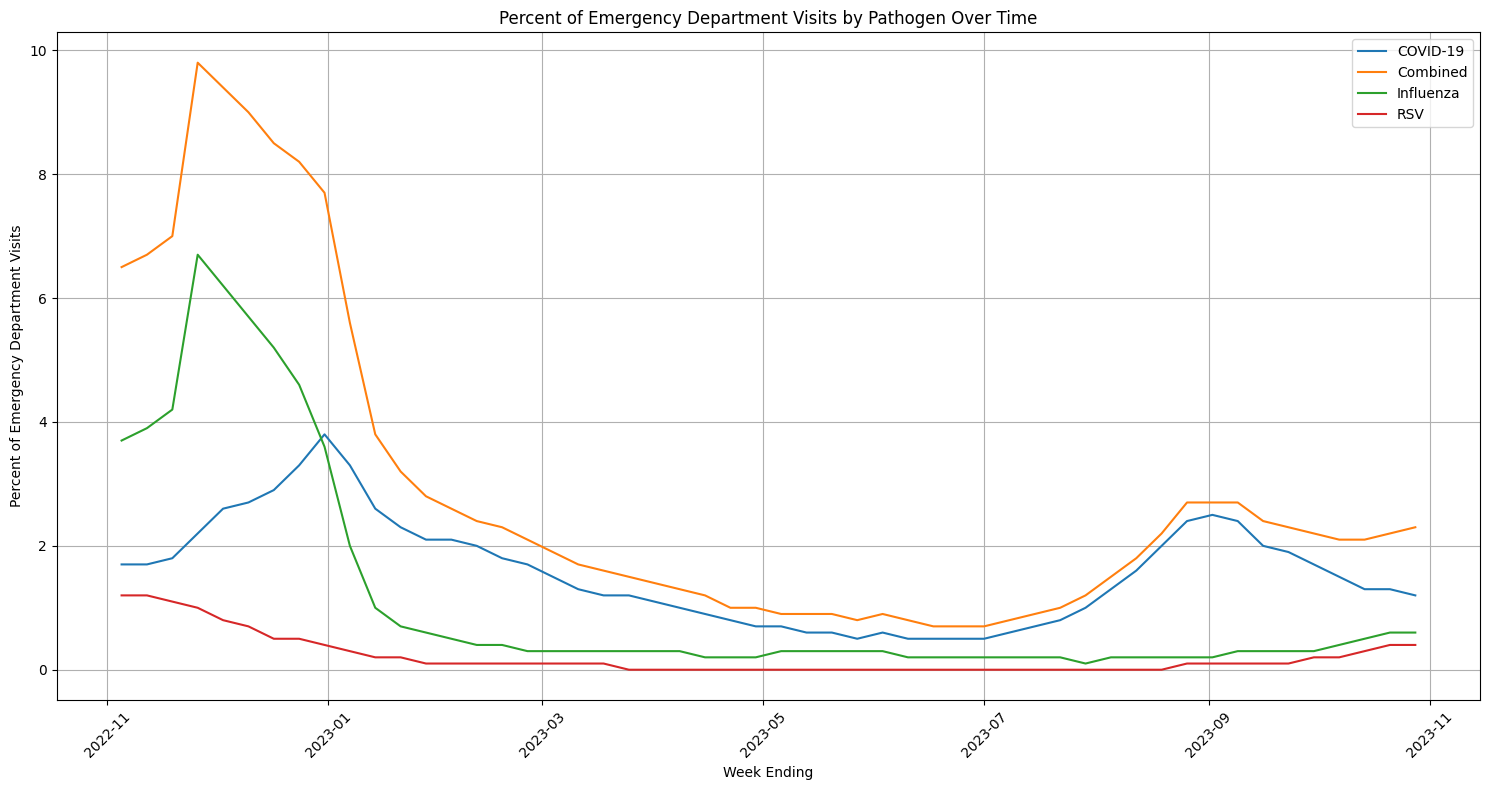

In [ ]:

national_data = data[data['geography'] == 'United States']

pivot_data = national_data.pivot(index='week_end', columns='pathogen', values='percent_visits')

pivot_data.index = pd.to_datetime(pivot_data.index)


pivot_data = pivot_data.sort_index()

plt.figure(figsize=(15, 8))

for pathogen in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[pathogen], label=pathogen)

plt.legend()
plt.xlabel('Week Ending')
plt.ylabel('Percent of Emergency Department Visits')
plt.title('Percent of Emergency Department Visits by Pathogen Over Time')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Dropdown(description='State:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', …

Dropdown(description='Year:', options=(2022, 2023), value=2022)

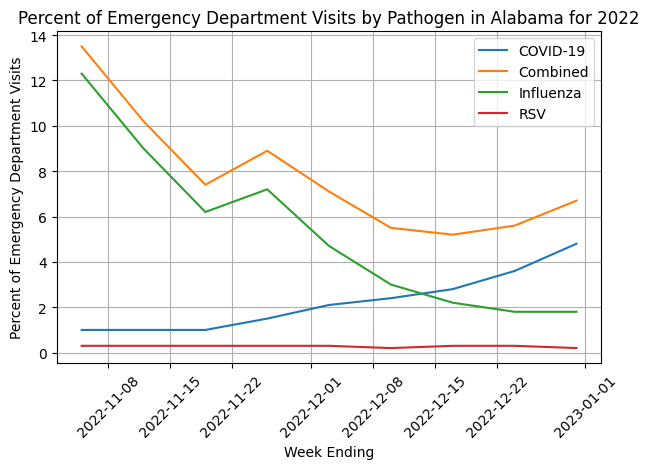

In [ ]:



data['year'] = pd.to_datetime(data['week_end']).dt.year


states = data['geography'].unique()
years = data['year'].unique()


state_dropdown = widgets.Dropdown(options=states, description='State:')
year_dropdown = widgets.Dropdown(options=years, description='Year:')


def update_plot(state, year):
    plt.clf()
    filtered_data = data[(data['geography'] == state) & (data['year'] == year)]

    pivot_data = filtered_data.pivot(index='week_end', columns='pathogen', values='percent_visits')
    pivot_data.index = pd.to_datetime(pivot_data.index)
    pivot_data = pivot_data.sort_index()

    for pathogen in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[pathogen], label=pathogen)

    plt.legend()
    plt.xlabel('Week Ending')
    plt.ylabel('Percent of Emergency Department Visits')
    plt.title(f'Percent of Emergency Department Visits by Pathogen in {state} for {year}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

display(state_dropdown, year_dropdown)

def on_value_change(change):
    update_plot(state_dropdown.value, year_dropdown.value)

state_dropdown.observe(on_value_change, names='value')
year_dropdown.observe(on_value_change, names='value')

update_plot(state_dropdown.value, year_dropdown.value)



In [ ]:
! wget -q -O  States_shapefile.shx 'https://doc.google.com/uc?export=download&id=1-wA8gtvHuPmzzJJDxsHPfmtCitN_eekr&export=download'
! wget -q -O  States_shapefile.shp 'https://doc.google.com/uc?export=download&id=1KgQI-QPVklsFF-KimBLA8kehV8-3GUUT&export=download'
! wget -q -O  States_shapefile.prj 'https://doc.google.com/uc?export=download&id=1JjsEQX0AiL98xVhrVfvAH5KsOL_z6OwK&export=download'
! wget -q -O  States_shapefile.dbf 'https://doc.google.com/uc?export=download&id=1R2AN00hVGfAWa0IVwY7jNO9kmyPLddUI&export=download'
! wget -q -O  States_shapefile.cpg 'https://doc.google.com/uc?export=download&id=1s5c56qgDzmuvwYE65sv0SBH1EDbtrZvp&export=download'

USmap=gpd.read_file('States_shapefile.shp')

In [ ]:
data1=data[['week_end','pathogen','geography','percent_visits']]
data1.rename(columns={'year': 'Year'}, inplace=True)
data1.rename(columns={'pathogen': 'Covid'}, inplace=True)
data1.rename(columns={'geography': 'State_Name'}, inplace=True)
data1.rename(columns={'percent_visits': 'percent_visits'}, inplace=True)
data1['State_Name']=data1['State_Name'].str.upper()

<ipython-input-10-4c039b16cf7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'year': 'Year'}, inplace=True)
<ipython-input-10-4c039b16cf7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'pathogen': 'Covid'}, inplace=True)
<ipython-input-10-4c039b16cf7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'geography': 'State_Name'}, inplace=True)
<ipython-input-10-4c0

In [ ]:
us1 = pd.merge(USmap, data1, on='State_Name',how='outer',indicator=True)
us1[['State_Name','Covid','percent_visits','_merge']]

,State_Name,Covid,percent_visits,_merge
0,ALABAMA,COVID-19,1.0,both
1,ALABAMA,Influenza,12.3,both
2,ALABAMA,RSV,0.3,both
3,ALABAMA,Combined,13.5,both
4,ALABAMA,COVID-19,1.0,both
...,...,...,...,...
9983,UNITED STATES,Combined,2.2,right_only
9984,UNITED STATES,COVID-19,1.2,right_only
9985,UNITED STATES,Influenza,0.6,right_only
9986,UNITED STATES,RSV,0.4,right_only


  State_Name     Covid  percent_visits _merge
0    ALABAMA  COVID-19             1.0   both
1    ALABAMA  COVID-19             1.0   both
2    ALABAMA  COVID-19             1.0   both
3    ALABAMA  COVID-19             1.5   both
4    ALABAMA  COVID-19             2.1   both


<Axes: >

[]

[]

Text(0.5, 1.0, '2022 percent_visits for Covid - 19')

Text(0.5, 0.1, 'Data from CDC')

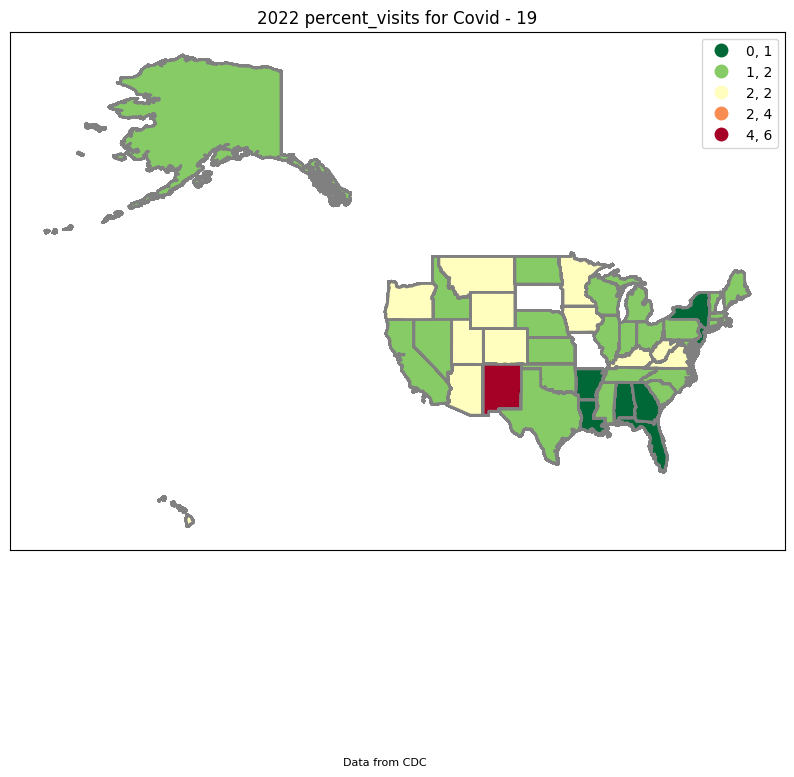

In [ ]:
data1_covid_only = data1[data1['Covid'] == 'COVID-19']

us1 = pd.merge(USmap, data1_covid_only, on='State_Name', how='outer', indicator=True)

print(us1[['State_Name', 'Covid', 'percent_visits', '_merge']].head())

fig, ax = plt.subplots(figsize=(10, 12))

us1.plot(ax=ax, column='percent_visits', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=2,
         legend_kwds={"fmt": "{:,.0f}"})

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('2022 percent_visits for Covid - 19')

plt.figtext(0.5, 0.1, '''Data from CDC''', ha="center", fontsize=8)


plt.show()

#Part 2#
##The restrictions put in place to limit the spread and impact of Covid-19 have had a wide-ranging impact on people’s lives and how energy is used across the economy.##


Tourist ratio：With the arrival of the new museum, people’s travel has been greatly affected

In [ ]:
! wget -q -O  visitors-transit-covid.csv 'https://doc.google.com/uc?export=download&id=13Kt4N8rRWOTj9_PmnfW5vnhzPPU70nwd&export=download'
trans = pd.read_csv('visitors-transit-covid.csv')

In [ ]:
! wget -q -O  visitors-transit-covid.csv 'https://doc.google.com/uc?export=download&id=13Kt4N8rRWOTj9_PmnfW5vnhzPPU70nwd&export=download'
trans = pd.read_csv('visitors-transit-covid.csv')

<ipython-input-15-f56bb5e38568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_usa['Day'] = pd.to_datetime(trans_usa['Day'])


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Transit Stations: How did the number of visitors change relative to before the pandemic')

Text(0.5, 0, 'Date')

Text(0, 0.5, '% Change from Baseline')

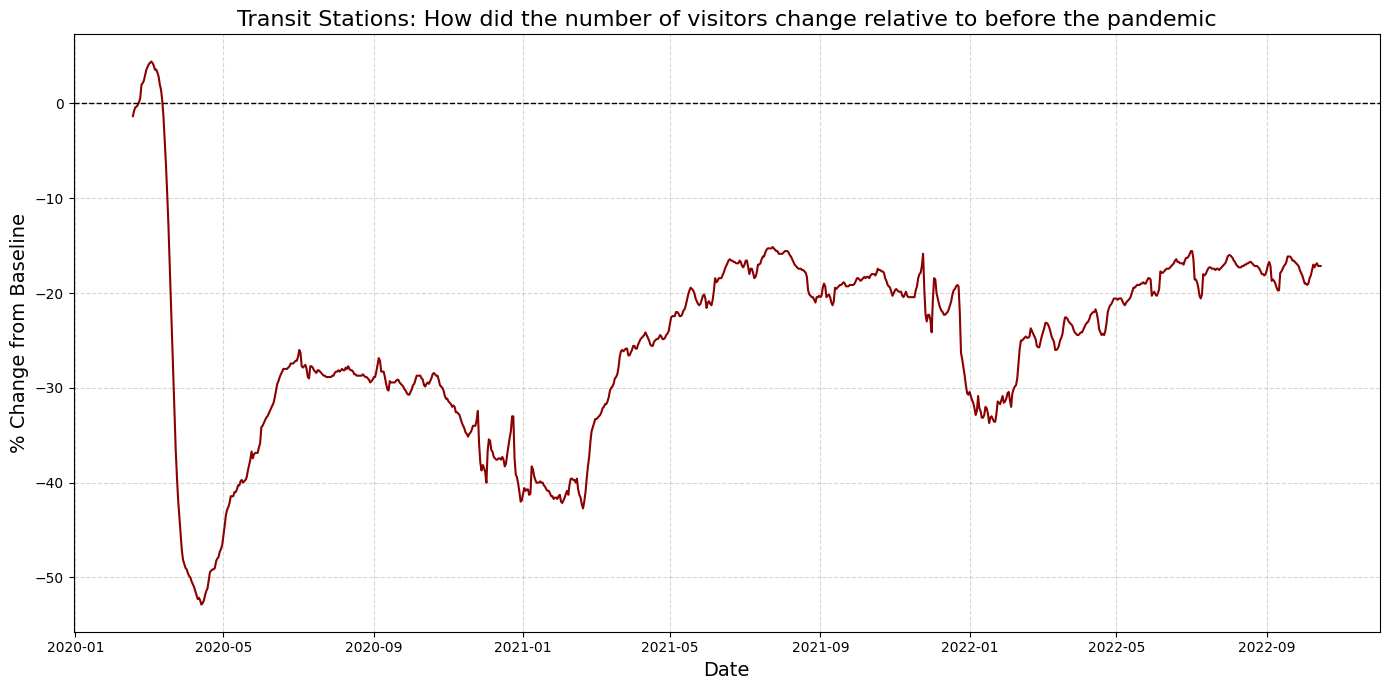

In [ ]:

trans_usa = trans[trans['Entity'] == 'United States']

trans_usa['Day'] = pd.to_datetime(trans_usa['Day'])

plt.figure(figsize=(14, 7))
plt.plot(trans_usa['Day'], trans_usa['transit_stations'], color='darkred', linewidth=1.5)
plt.title('Transit Stations: How did the number of visitors change relative to before the pandemic', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change from Baseline', fontsize=14)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


plt.savefig('path_to_save_figure.png')


plt.show()

In [ ]:
! wget -q -O  US_reporting_frequency.csv 'https://doc.google.com/uc?export=download&id=19TX8gjplvRB0utcItnxptjA_jHgEDDlO&export=download'
transit_data = pd.read_csv('US_reporting_frequency.csv')

Location of transportation stations in the United States

In [ ]:
! wget -q -O  National_Transit_Map_Agencies.csv 'https://doc.google.com/uc?export=download&id=14EiMHmypgqcvtbxpF3HdD3tScYaNDPSP&export=download'
transit_data = pd.read_csv('National_Transit_Map_Agencies.csv')

In [ ]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[39.50, -98.35], zoom_start=4)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in transit_data.iterrows():
    folium.Marker([row['Y'], row['X']], popup=row['agency_name']).add_to(marker_cluster)


m

In [ ]:
! wget -q -O  Trips_by_Distance_20231114.csv 'https://doc.google.com/uc?export=download&id=1lI4eux1K16S_RNg8fOMvxj9i5DE8ap9T&export=download'
Trips_data = pd.read_csv('Trips_by_Distance_20231114.csv')

Comparison between going out during the epidemic and during the epidemic

In [ ]:
Trips_data.head(10)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1
5,National,2019/01/06,NaN,NaN,NaN,NaN,66498949.0,259668471.0,1.073941e+09,268535036.0,...,163231150.0,144091310.0,46931537.0,17418975.0,8160971.0,1917898.0,1403061.0,00-00000-20190106,1,1
6,National,2019/01/07,NaN,NaN,NaN,NaN,62840591.0,263326829.0,1.144742e+09,301592063.0,...,169846852.0,165178406.0,55660657.0,17491604.0,7584683.0,1815569.0,1428289.0,00-00000-20190107,1,1
7,National,2019/01/08,NaN,NaN,NaN,NaN,63064293.0,263103127.0,1.141498e+09,299541016.0,...,169468215.0,166322929.0,55968279.0,17369502.0,7471402.0,1856802.0,1434182.0,00-00000-20190108,1,1
8,National,2019/01/09,NaN,NaN,NaN,NaN,62305155.0,263862265.0,1.135629e+09,291070223.0,...,170647903.0,166169173.0,55640198.0,17543261.0,7709071.0,1923976.0,1498183.0,00-00000-20190109,1,1
9,National,2019/01/10,NaN,NaN,NaN,NaN,61355771.0,264811649.0,1.161335e+09,297556678.0,...,174998777.0,171169293.0,57136281.0,18087977.0,7940284.0,1975790.0,1520249.0,00-00000-20190110,1,1


In [ ]:
Trips_data1=Trips_data[['State Postal Code','Population Not Staying at Home','Date']]
Trips_data1.rename(columns={'State Postal Code': 'State_Code'}, inplace=True)
Trips_data1.rename(columns={'Population Not Staying at Home': 'out'}, inplace=True)
Trips_data1.rename(columns={'Date': 'Date'}, inplace=True)
Trips_data1

<ipython-input-52-cf21b407a3ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips_data1.rename(columns={'State Postal Code': 'State_Code'}, inplace=True)
<ipython-input-52-cf21b407a3ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips_data1.rename(columns={'Population Not Staying at Home': 'out'}, inplace=True)
<ipython-input-52-cf21b407a3ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips_data1.rename(columns={'Date'

,State_Code,out,Date
0,NaN,248733553.0,2019/01/01
1,NaN,264862219.0,2019/01/02
2,NaN,263116940.0,2019/01/03
3,NaN,264363768.0,2019/01/04
4,NaN,261777675.0,2019/01/05
...,...,...,...
5650181,DE,770927.0,2023/11/04
5650182,ME,1069841.0,2023/11/04
5650183,OK,3152583.0,2023/11/04
5650184,WI,4673280.0,2023/11/04


In [ ]:
Trips_data1['State_Code'] = Trips_data1['State_Code'].astype(str).str.upper()

<ipython-input-53-38f6360e6455>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips_data1['State_Code'] = Trips_data1['State_Code'].astype(str).str.upper()


In [ ]:
Trips_data1

,State_Name,out,Date
0,NAN,248733553.0,2019/01/01
1,NAN,264862219.0,2019/01/02
2,NAN,263116940.0,2019/01/03
3,NAN,264363768.0,2019/01/04
4,NAN,261777675.0,2019/01/05
...,...,...,...
5650181,NAN,770927.0,2023/11/04
5650182,NAN,1069841.0,2023/11/04
5650183,NAN,3152583.0,2023/11/04
5650184,NAN,4673280.0,2023/11/04


In [ ]:
us1 = pd.merge(USmap, Trips_data1, on='State_Code',how='outer',indicator=True)
us1[['State_Code','Date','out','_merge']]

,State_Code,Date,out,_merge
0,AL,2019/01/01,3844356.0,both
1,AL,2019/01/02,4067659.0,both
2,AL,2019/01/03,4042510.0,both
3,AL,2019/01/04,4061987.0,both
4,AL,2019/01/05,4020196.0,both
...,...,...,...,...
5650181,NAN,2023/10/31,257876794.0,right_only
5650182,NAN,2023/11/01,258534362.0,right_only
5650183,NAN,2023/11/02,259897823.0,right_only
5650184,NAN,2023/11/03,260392462.0,right_only


In [ ]:
us1.State_Code

0           AL
1           AK
2           AZ
3           AR
4           CA
          ... 
5650232    NaN
5650233    NaN
5650234    NaN
5650235    NaN
5650236    NaN
Name: State_Code, Length: 5650237, dtype: object

<Axes: >

Text(0.5, 1.0, 'USA trave Values for 2022')

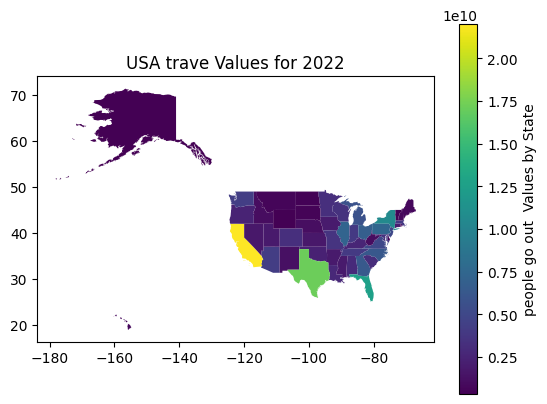

In [ ]:
us1['Year'] = pd.to_datetime(us1['Date']).dt.year


us1_filtered = us1[us1['Year'].isin([2022])]


us1_grouped = us1_filtered.groupby(['State_Code', 'Year'])['out'].sum().reset_index()

map_data = pd.merge(USmap, us1_grouped, on='State_Code', how='left')

gdf = gpd.GeoDataFrame(map_data)


fig, ax = plt.subplots(1, 1)
gdf.plot(column='out', ax=ax, legend=True,
         legend_kwds={'label': "people go out  Values by State"},
         cmap='viridis')

plt.title('USA travel Values for 2022')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px



us1['Year'] = pd.to_datetime(us1['Date']).dt.year


us1_filtered = us1[us1['Year'].isin([2021, 2022, 2023])]

us1_grouped = us1_filtered.groupby(['State_Code', 'Year'])['out'].sum().reset_index()


fig = px.choropleth(us1_grouped,
                    locations='State_Code',
                    color='out',
                    hover_name='State_Code',
                    animation_frame='Year',
                    locationmode='USA-states',
                    scope="usa",
                    color_continuous_scale='Viridis')


fig.update_layout(
    title_text='Number of People Going Outside by State and Year',
    geo=dict(
        lakecolor='rgb(255, 255, 255)'),
    )


fig.show()